<a href="https://colab.research.google.com/github/Himakar06/Heart_disease_analysis/blob/main/notebooks/heart_disease_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
def load_dataset(path):
  return pd.read_csv(path)

In [134]:
df = load_dataset('heart_disease.csv')

In [135]:
#Distribution plot of Age, Cholesterol, RestingBP

def distribution_plot(df):
  fig,axes = plt.subplots(1,3,figsize=(8,5))
  sns.histplot(df['Age'],kde=True,color='red',ax=axes[0])
  axes[0].set_title("Distribution of Age")

  sns.histplot(df['Cholesterol'],kde=True,color='blue',ax=axes[1])
  axes[1].set_title("Distribution of Cholesterol")

  sns.histplot(df['RestingBP'],kde=True,color='black',ax=axes[2])
  axes[2].set_title("Distribution of RestingBP")

  plt.tight_layout()
  plt.show()

In [136]:
#Countplot of Sex, ChestPainType, HeartDisease

def count_plot(df):
  fig, axes = plt.subplots(1, 3, figsize=(12, 5))

  sns.countplot(x='Sex', data=df, ax=axes[0])
  axes[0].set_title("Distribution of Sex")

  sns.countplot(x='ChestPainType', data=df, ax=axes[1])
  axes[1].set_title("Distribution of ChestPainType")

  sns.countplot(x='HeartDisease', data=df, ax=axes[2])
  axes[2].set_title("Distribution of HeartDisease")

  plt.tight_layout()
  plt.show()

In [137]:
#Boxplot: ChestPainType vs Cholesterol
#Violinplot: ST_Slope vs Oldpeak
#Barplot: Sex vs HeartDisease
#Scatterplot: MaxHR vs Age

def various_plot(df):
  fig ,axes = plt.subplots(2,2,figsize=(8,6))
  sns.boxplot(x='ChestPainType' ,y='Cholesterol',data = df,ax=axes[0,0])
  axes[0,0].set_title('ChestPainType vs Cholesterol')

  sns.violinplot(x='ST_Slope',y='Oldpeak',data = df,ax=axes[0,1])
  axes[0,1].set_title('ST_Slope vs Oldpeak')

  sns.barplot(x='Sex',y='HeartDisease',data = df,ax=axes[1,0])
  axes[1,0].set_title('Sex vs HeartDisease')

  sns.scatterplot(x='MaxHR',y='Age',data = df,ax=axes[1,1])
  axes[1,1].set_title('MaxHR vs Age')
  plt.tight_layout()
  plt.show()

In [138]:
#Pairplot of top 4 numeric columns colored by HeartDisease
#Heatmap for correlation matrix
#Multivariate group-by: avg Oldpeak by Sex & ST_Slope
def multi_variate(df):

    sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']], hue='HeartDisease')
    plt.suptitle('Pairplot of Numeric Features Colored by HeartDisease', y=1.02)
    plt.show()

    plt.figure(figsize=(8, 6))
    corr_matrix = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    plt.figure(figsize=(8, 6))
    df.groupby(['Sex', 'ST_Slope'])['Oldpeak'].mean().unstack().plot(kind='bar')
    plt.title('Average Oldpeak by Sex and ST_Slope')
    plt.ylabel('Average Oldpeak')
    plt.tight_layout()
    plt.show()


In [139]:
def engineering_feature(df):
  df['AgeGroup'] = pd.cut(df['Age'],bins=[0,25,50,100],labels=['Young','Middle','Senior'])
  df['BP_Category'] = df['RestingBP'].apply(lambda x: 'Low' if x < 90 else('Normal' if x <120 else 'High'))
  return df

In [140]:
from sklearn.preprocessing import LabelEncoder
def preprocessing(df):
  df= pd.get_dummies(df,columns=['ChestPainType','ExerciseAngina'],drop_first=True)
  le = LabelEncoder()
  df['Sex']=le.fit_transform(df['Sex'])
  df['ST_Slope']=le.fit_transform(df['ST_Slope'])
  return df

In [141]:
#Do older patients have more heart disease risk?

def risk(df):
  print("\nHeart Disease risk with Age:")
  age_risk = df.groupby('AgeGroup')['HeartDisease'].mean().sort_values(ascending=False)
  print(age_risk)
  plt.figure(figsize=(8, 6))
  age_risk.plot(kind='bar')
  plt.title('Heart Disease Risk by Age Group')
  plt.xlabel('Age Group')
  plt.ylabel('Heart Disease Risk')
  plt.show()



In [149]:
#Are males more at risk?

def males_risk(df):
  print('\nRisk of males and females:')
  sex_risk = df.groupby('Sex')['HeartDisease'].mean().sort_values(ascending=False)
  print(sex_risk)
  if sex_risk.iloc[0]>sex_risk.iloc[1]:
    print('Males are more at risk')
  else:
    print('Females are more at risk')


In [150]:
def main():

  df= load_dataset('heart_disease.csv')
  print("loaded dataset")
  print(df.head())
  print(df.shape)

  distribution_plot(df)
  count_plot(df)
  various_plot(df)
  multi_variate(df)

  df = engineering_feature(df)
  print("Featured Engineering data")
  print(df.head())

  df = preprocessing(df)
  print("Preprocessed data")
  print(df.head())

  risk(df)

  males_risk(df)


  return df

loaded dataset
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


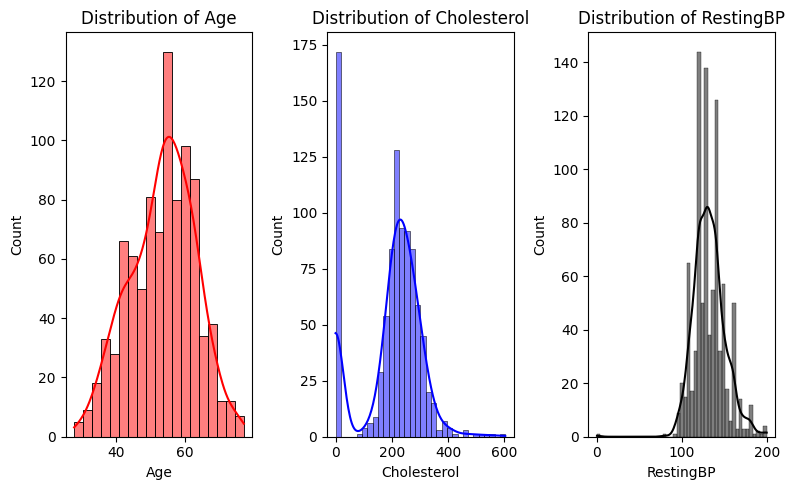

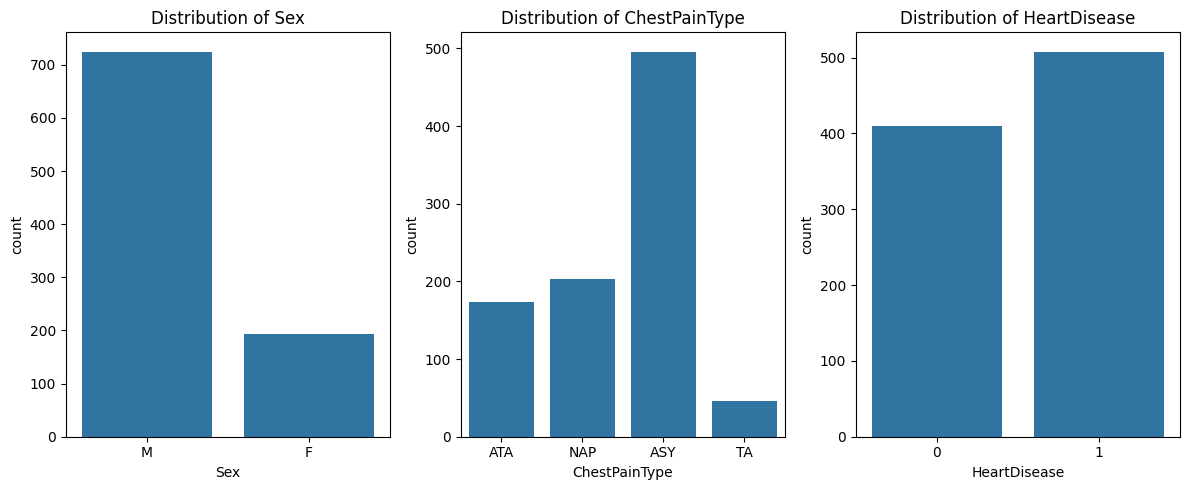

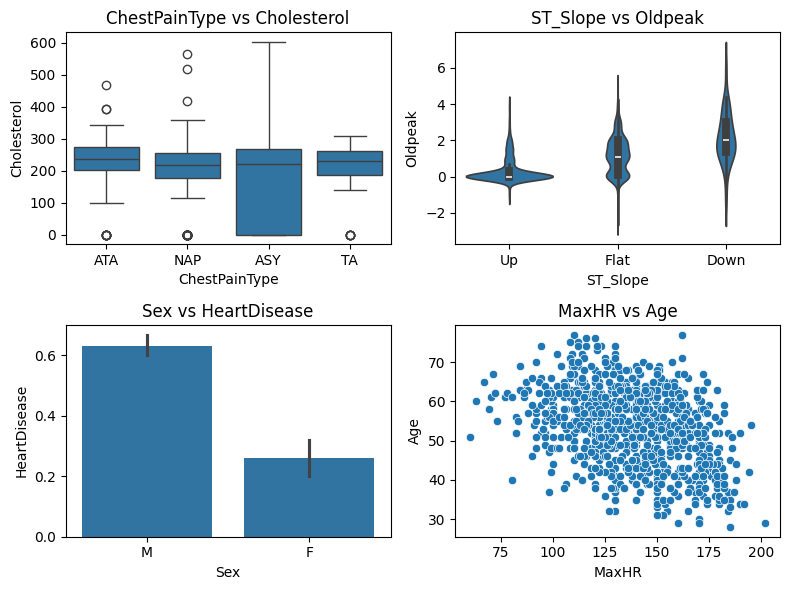

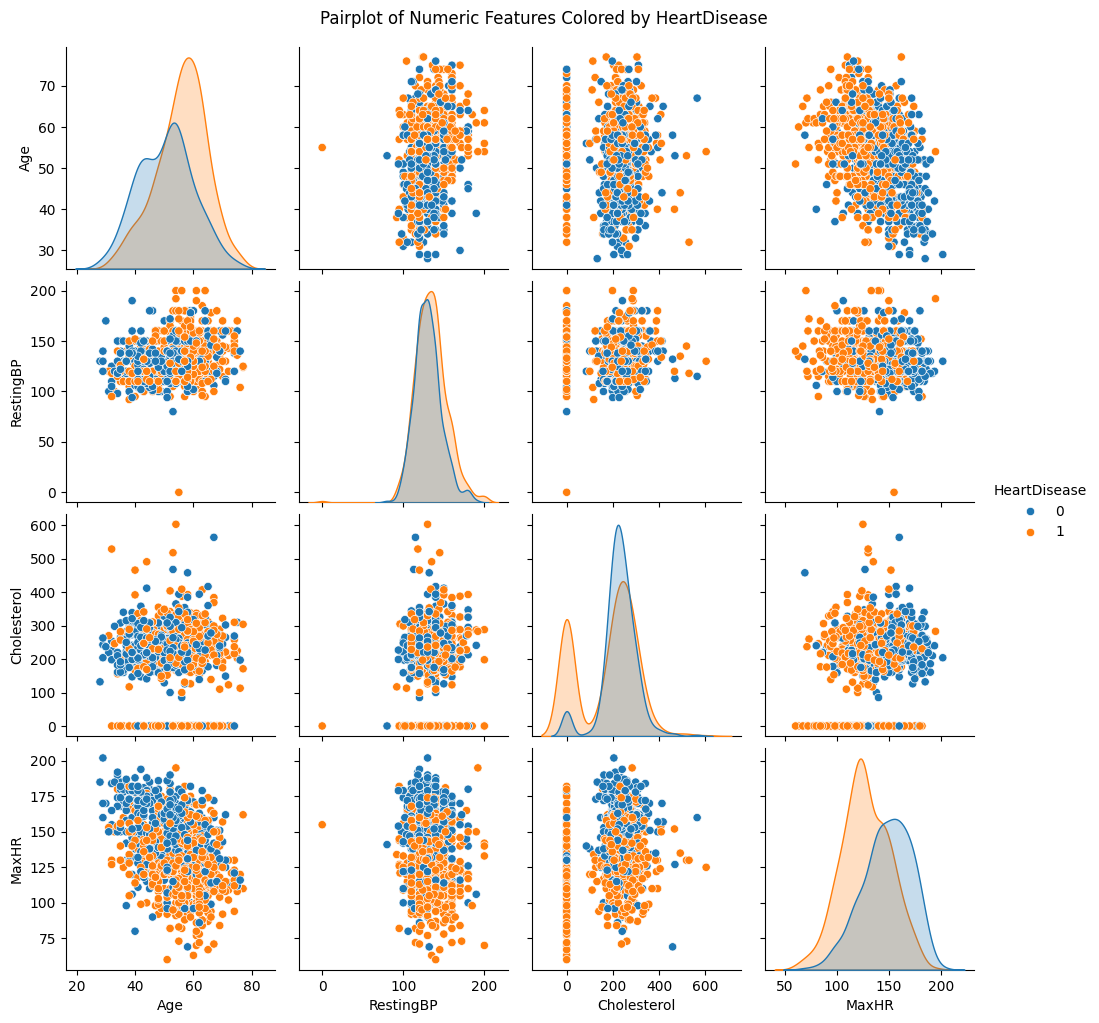

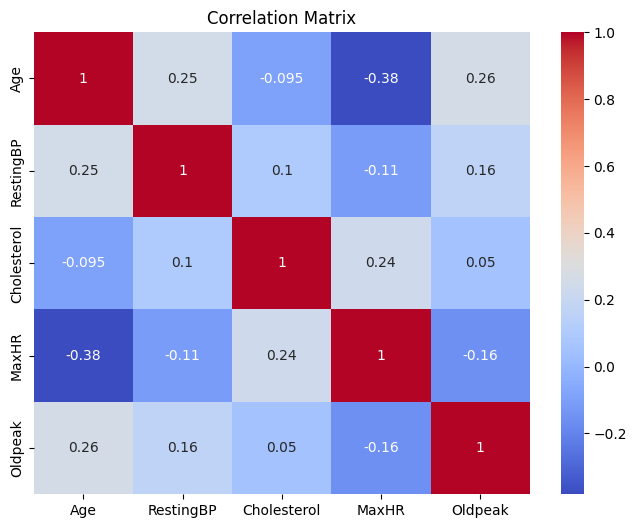

<Figure size 800x600 with 0 Axes>

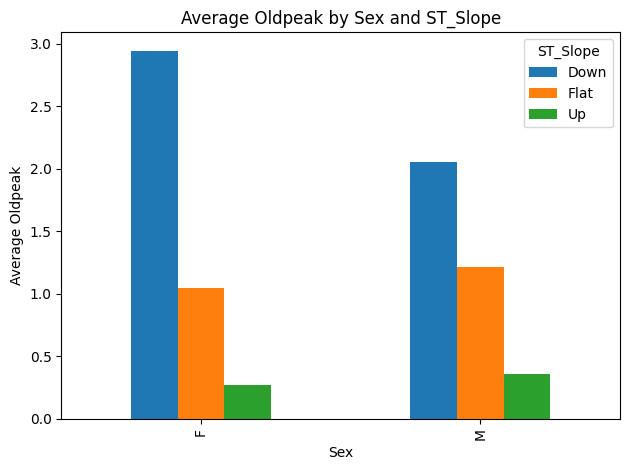

Featured Engineering data
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease AgeGroup BP_Category  
0              N      0.0       Up             0   Middle        High  
1              N      1.0     Flat             1   Middle        High  
2              N      0.0       Up             0   Middle        High  
3              Y      1.5     Flat             1   Middle        High  
4              N      0.0       Up             0   Senior        High  
Preprocessed data
   Age  Sex  RestingBP  Cholesterol  

<ipython-input-141-237781960>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df.groupby('AgeGroup')['HeartDisease'].mean().sort_values(ascending=False)


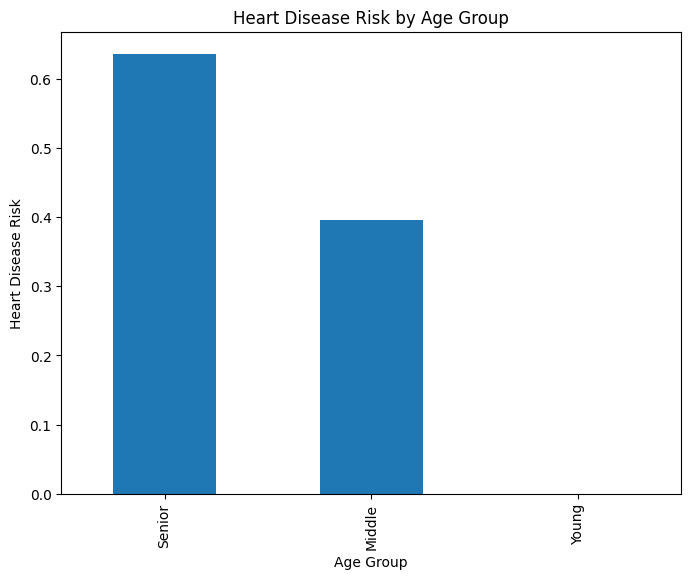


Risk of males and females:
Sex
1    0.631724
0    0.259067
Name: HeartDisease, dtype: float64
Males are more at risk


In [151]:
df_final = main()